Reading data ...
finish reading data!
Modifing data ...
Modifing process:99%
 Recognize events ...
Recognizing process:100%
 Selecting ...
selection progress:94%
 100% finished!


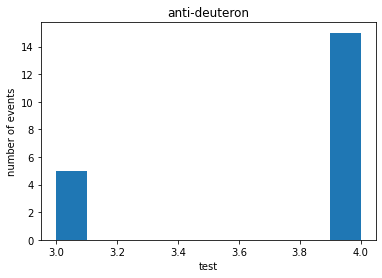

[4 4 3 3 4 4 4 4 3 4 4 4 4 4 4 3 4 4 3 4]
finished!


In [152]:
"""
Statistics: count difference between anti-deuteron and anti-proton
@aurthor Jiancheng Zeng
@July 15 2021

"""

import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import array
import pandas as pd

case1 = 0
case2 = 0
case3 = 0
case4 = 0
event = []
identical = []

"""
Select by name of the column
---------------------
"""
title = ["eventID", "trackID", "parentID", "particleID", "copyNb1 (mother volume)", "copyNb", "material", "time (ns)", "energy(MeV)", "energy deposit(MeV)", "parent process name", "process name", "px (MeV/c)", "py (MeV/c)", "pz (MeV/c)", "step length (cm)", "x (cm)", "y (cm)", "z (cm)"]

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/GitHub/Geant4-simulation/Original_2021/output/test.dat")    #get data file
print("finish reading data!")

"""
selection
"""
print("Modifing data ...")
for i in range(0, len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)


"""
recognize the data file length distribution
"""
print("\n Recognize events ...")
s = 0
temp = 1;
while s < len(event[:,0]):
    if(int(event[s,0]) == temp):
        identical.append(s)
        temp = temp + 1
    s = s + 1
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)

case = np.full(
  shape=len(identical)+1,
  fill_value=4,
  dtype=np.int
)

"""
counting
"""
print("\n Selecting ...")

for k in range(len(identical)):
    for j in range(selection[k].shape[0]):
        for l in range(j, selection[k].shape[0]):
            if(selection[k][l][3] == '-2212'):
                if(str(selection[1][150][6]) == 'LAr'):
                    case[k] = 3
                else:
                    case[k] = 2
                break  
        else:
            case[k] = 4
            continue
        break
    print("selection progress:"+str(int(100*k/len(identical)))+"%", end='\r')
    #time.sleep(0.1)

print("\n 100% finished!")
"""
if(l == selection[k].shape[0]):
                if(selection[k][l][3] != '-2212' and float(selection[k][j][18]) < 0 and str(selection[k][j][6]) != 'LAr'):
                    case1 = case1 + 1
                else:
                    case4 = case4 + 1
"""

plt.hist(case)
plt.xlabel('test')
plt.ylabel('number of events')
plt.title('anti-deuteron')
plt.show()
print(case)
#print("\n", case1, "\n", case2, "\n", case3, "\n", case4, "\n")
print("finished!")
